# Part 1 - Preparing the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

sns.set_theme()
sns.set_style()

drive.mount("/drive")

Mounted at /drive


In [5]:
df = pd.read_csv("/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/4. Basic Artificial Neural Networks - ANNs/fake_reg.csv")

In [6]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Some Exploration

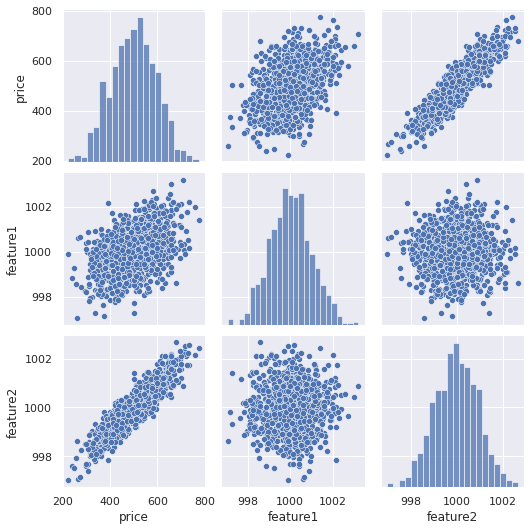

In [7]:
sns.pairplot(df)

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[["feature1", "feature2"]].values
y = df['price'].values

In [12]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape

(700, 2)

In [15]:
X_test.shape

(300, 2)

## Normalize or Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

# Part 2 - Creating and Training Model

## Create the Model with Keras

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Two ways to Create Keras model

### 1st



In [24]:
model = Sequential([Dense(units = 4, activation = 'relu'),
                    Dense(units = 2, activation = 'relu'),
                    Dense(units = 1)])

### 2nd

In [27]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [28]:
model.fit(X_train, y_train, epochs = 250, verbose = 1)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256579.6875
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256413.1719
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256243.3594
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256028.5938
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255774.2656
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255487.3594
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255172.4531
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254824.5000
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254433.7812
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 253997.5312
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253515.8594
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

## Plotting Loss

In [29]:
loss_df = pd.DataFrame(model.history.history)

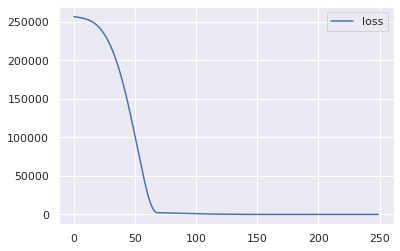

In [34]:
loss_df.plot()

# Part 3 - Model Evaluation

In [35]:
model.evaluate(X_test, y_test, verbose = 0)

25.12853240966797

In [36]:
model.evaluate(X_train, y_train, verbose = 0)

23.728824615478516

In [37]:
test_predictions = model.predict(X_test)

In [42]:
test_predictions = pd.Series(test_predictions.reshape(300, ))

In [43]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])

In [44]:
pred_df = pd.concat([pred_df, test_predictions], axis = 1)

In [45]:
pred_df.head()

,Test True Y,0
0,402.296319,405.524048
1,624.156198,624.014893
2,582.455066,592.564758
3,578.588606,572.662354
4,371.224104,366.841705


In [46]:
pred_df.columns = ["Test True Y", "Model Predictions"]

In [47]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.524048
1,624.156198,624.014893
2,582.455066,592.564758
3,578.588606,572.662354
4,371.224104,366.841705


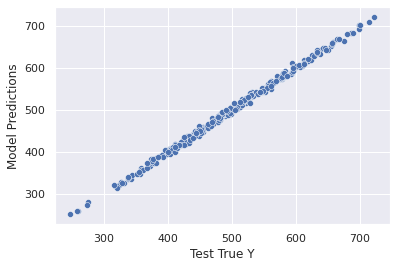

In [50]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

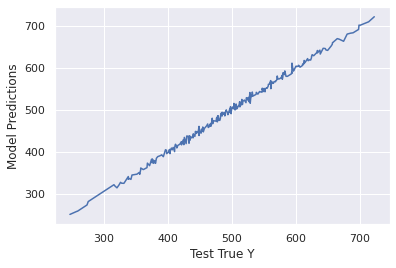

In [51]:
sns.lineplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

## MSE, RMSE, RMAE

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.024790999413062

Means we are 4 dollars off

In [55]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.128527878627402

**rmse**

In [56]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.012836310775308

## Testing on something Original

In [57]:
new_gem = [[998, 1000]]

In [58]:
new_gem = scaler.transform(new_gem)

In [59]:
model.predict(new_gem)

array([[419.96805]], dtype=float32)

## Saving the Model

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save('/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/4. Basic Artificial Neural Networks - ANNs/my_gem_model.h5')

In [62]:
later_model = load_model("/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/4. Basic Artificial Neural Networks - ANNs/my_gem_model.h5")

In [63]:
later_model.predict(new_gem)

array([[419.96805]], dtype=float32)